In [94]:
%matplotlib inline

import optuna
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df[['value', 'params_lr']]

,value,params_lr
0,-1.082020,0.088012
1,-1.351260,0.015096
2,-0.459252,0.001316
3,-0.484802,0.000132
4,-0.472107,0.009042
5,-0.459955,0.012048
6,-0.499933,0.000106
8,-0.516289,0.006716
12,-0.489443,0.017322
16,-0.495013,0.001639


best val: -0.4593


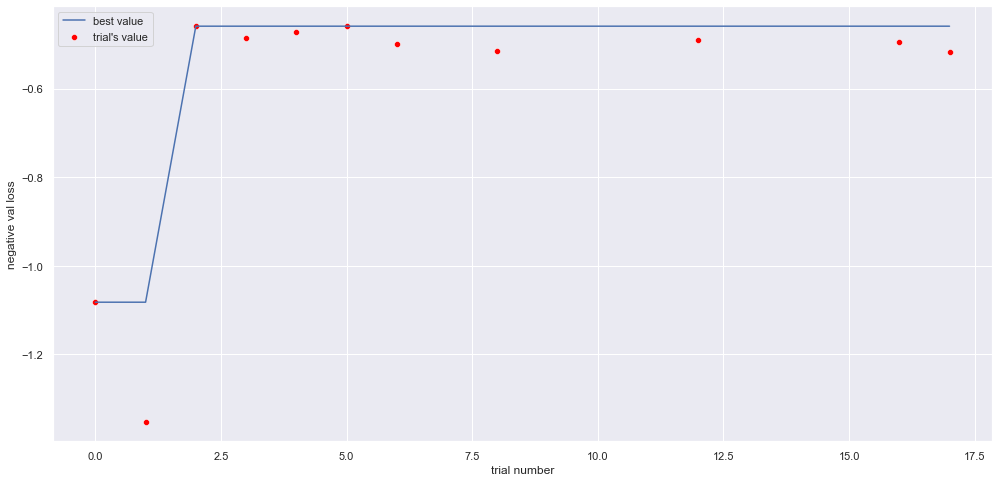

In [95]:
# loads study
study_name = "bayesian_opt_v2"
storage_name = f"sqlite:///C:/Users/Noaja/Downloads/msci_project/tth-ML-project/models/{study_name}.db"
study = optuna.load_study(study_name=study_name, storage=storage_name)

# converts study to DataFrame
df = study.trials_dataframe(attrs=("value", "params", "state"))
df.dropna(inplace=True)

# Removes loss values above threshold
threshold = 10.
df['value'] = -abs(df['value'])
df = df[abs(df['value']) < threshold]

sns.set(rc = {'figure.figsize':(15,8)})
print('best val:', round(df['value'].max(),4))

a = sns.lineplot(x=df.index, y=df['value'].cummax())
sns.scatterplot(x=df.index, y=df['value'], color='red')

a.set_xlabel('trial number')
a.set_ylabel('negative val loss')
a.legend(['best value', "trial's value"])

plt.show()

In [96]:
optuna.visualization.plot_param_importances(study)

In [97]:
optuna.visualization.plot_edf(study)

In [98]:
optuna.visualization.plot_parallel_coordinate(study)

In [99]:
optuna.visualization.plot_slice(study)

In [100]:
round(df.sort_values(by=['value'], ascending=False), 4).head(20)

,value,params_batch_size,params_dropout,params_lr,params_lstm_layer2,params_lstm_units,params_merged_units,params_num_merged_layers,params_redropout,state
2,-0.4593,16,0.2786,0.0013,True,100,240,1,0.0533,COMPLETE
5,-0.4600,16,0.4545,0.0120,False,340,260,2,0.0159,COMPLETE
4,-0.4721,16,0.4305,0.0090,False,260,180,1,0.0757,COMPLETE
3,-0.4848,128,0.2578,0.0001,False,280,360,3,0.0607,COMPLETE
12,-0.4894,128,0.1553,0.0173,True,40,400,3,0.5000,PRUNED
16,-0.4950,64,0.1058,0.0016,False,160,300,3,0.2951,PRUNED
6,-0.4999,32,0.1828,0.0001,False,220,40,1,0.0833,PRUNED
8,-0.5163,64,0.0803,0.0067,True,40,400,3,0.2425,PRUNED
17,-0.5181,128,0.2613,0.0012,False,400,360,1,0.1661,PRUNED
0,-1.0820,32,0.1880,0.0880,True,400,140,2,0.1916,COMPLETE
